#### Create Fourier transforms on different types of series

Ideas and some source code is from: https://drive.google.com/open?id=1AH6C4mHoORVgCusW78J2_brGR5JIhNxd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Set parameters for this instance of Jupyter Notebook
%matplotlib inline
%precision 4

file_location = "C:/Users/bre49823/Google Drive/AudioFiles/"


(100L,)

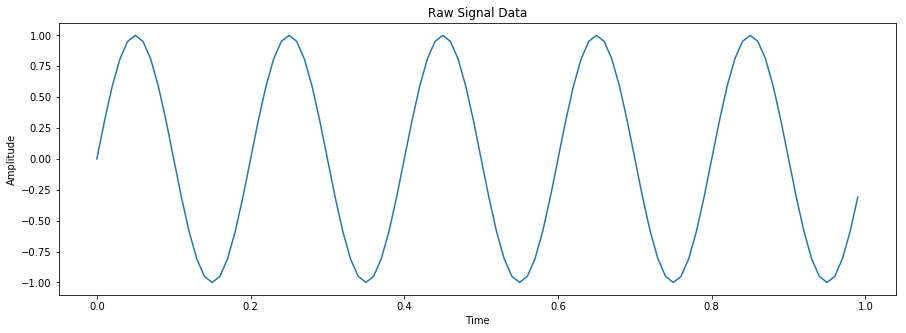

In [3]:
# Fourier transform of a sine wave
sampling_rate = 100.0
time = np.arange(0, 1, 1/sampling_rate)

frequency = 5                                       # Frequency in Hz
signal = np.sin(2 * np.pi * time * frequency)       # Create a sin wave with a period of "frequency"
nfft = 1024                                         # Length of FFT

# Plot raw data
plt.figure(figsize = (15, 5))
plt.plot(time, signal)
plt.title("Raw Signal Data")
plt.xlabel("Time")
plt.ylabel("Amplitude")

signal.shape

((513L,), (513L,), (513L,))


C:\Users\bre49823\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


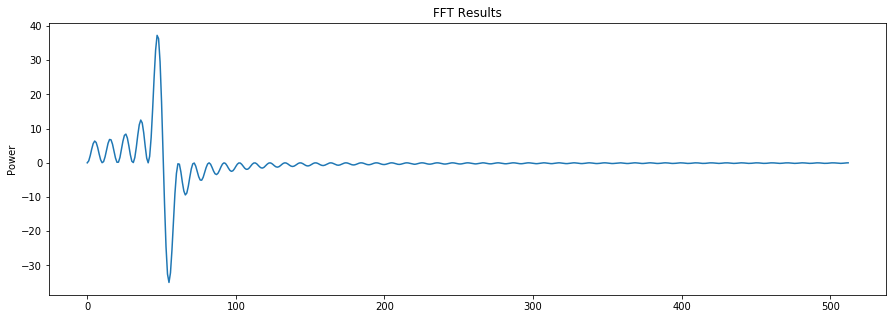

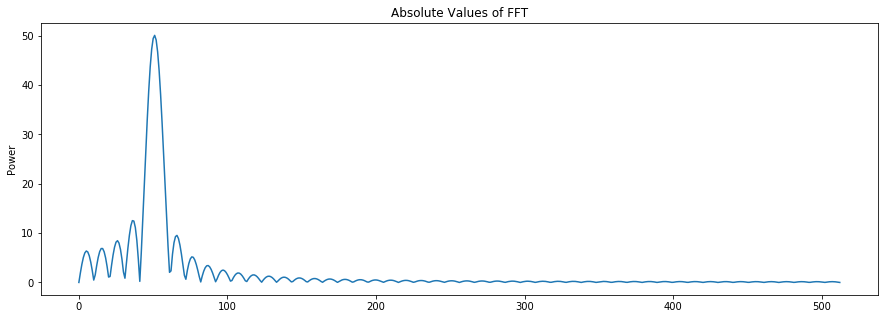

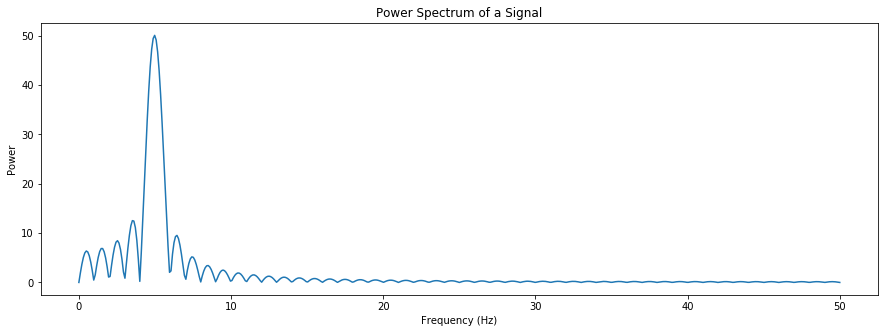

In [4]:
# Write the audio file to hear what it sounds like. Change the parameters and note how the sound changes
#wavfile.write(data = sin_wave, filename = file_location + "test.wav", rate = sampling_rate)

# Create Fourier transform
# The Fourier transformation is symmetric of which we only need the first half. With np.fft.rfft we get only the first half
nfft = 1024
signal_fft = np.fft.rfft(signal, n = nfft)    

plt.figure(figsize = (15, 5))
plt.plot(signal_fft)
plt.title("FFT Results")
plt.ylabel("Power")

# Calculate the magnitude of FFT
signal_fft_abs = np.abs(signal_fft)

plt.figure(figsize = (15, 5))
plt.plot(signal_fft_abs)
plt.title("Absolute Values of FFT")
plt.ylabel("Power")

# Frequency vector
freq_vector = np.arange(0, nfft/2 + 1) * (sampling_rate / nfft)

plt.figure(figsize = (15, 5))
plt.plot(freq_vector, signal_fft_abs)
plt.title('Power Spectrum of a Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')


print(signal_fft.shape, signal_fft_abs.shape, freq_vector.shape)

In [5]:
np.savetxt("C:/Users/bre49823/Google Drive/MusicEngine/DSP_Examples/freq_vector.csv", freq_vector, delimiter = ",")
np.savetxt("C:/Users/bre49823/Google Drive/MusicEngine/DSP_Examples/signal_fft_abs.csv", signal_fft_abs, delimiter = ",")

100


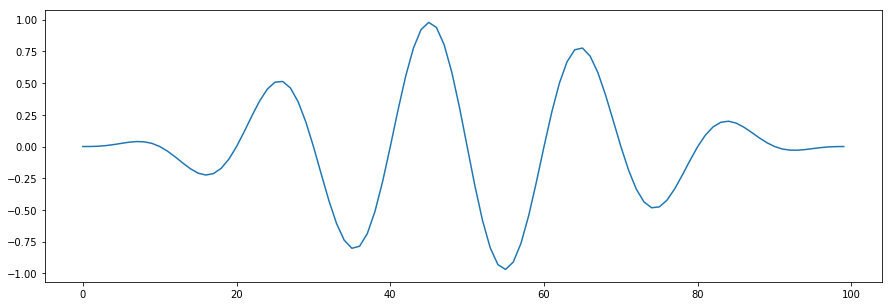

In [6]:
# Calculate FFT with a Hanning window
signal2 = signal

print(len(signal))
signal2 *= np.hanning(len(signal2))
plt.figure(figsize = (15, 5))
plt.plot(signal2)